## Aarushi Bhkshi-19A1HP101

In [2]:
import pandas as pd
import numpy as np
# importing pamdas and numpy to operate on dataframes and numeric operations respectively

In [3]:
adv_df = pd.read_csv( 'Advertising.csv' )
# importing csv file into dataframe

In [4]:
adv_df.info()
# Check variables for respective DATA TYPE and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [9]:
# From above we can conclude all variables are read properly but there are few null values in the dataset

#checking the null values in TV

adv_df[adv_df.TV.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
68,69,NaN,27.5,11.0,NaN,12.8


In [10]:
#checking the null values in Radio

adv_df[adv_df.Radio.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
42,43,293.6,NaN,1.8,NaN,10.4


In [11]:
#checking the null values in Day

adv_df[adv_df.Day.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2
42,43,293.6,NaN,1.8,NaN,10.4
68,69,NaN,27.5,11.0,NaN,12.8


In [12]:
# we need to delete S.no. 16,42,68 to get a dataset without missing values 
adv_df = adv_df.dropna(subset = ['Day'])

In [13]:
adv_df.info()
# checking if there are any null values now, we have deleted 3 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [25]:
# describe numeric variables
adv_df.describe()

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# importing libraries for plotting graphs and inline command to display output in the frontend

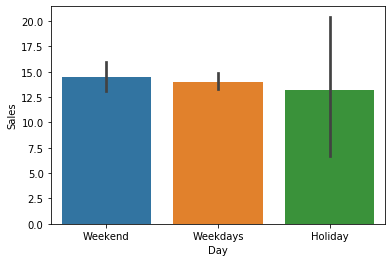

In [27]:
# to check sales for different days

sn.barplot(x = 'Day', y = 'Sales', data = adv_df)
# we observe all days have similar sales in total. (means per day dales on weekend and holidays much higher than weekdays)

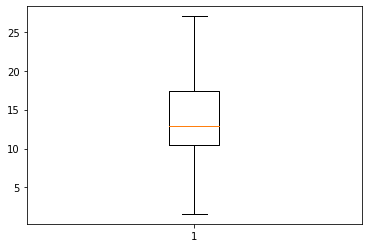

In [28]:
box = plt.boxplot(adv_df['Sales'])
#  a box plot helps understand the distrubution of sales data. 

In [29]:
[item.get_ydata()[0] for item in box['medians']]
#here we see median saled from the box plots is 12.9

[12.9]

In [14]:
# checking top few rows to know which is categorical variable
adv_df.head(10)

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
5,6,8.7,48.9,75.0,Weekdays,5.9
6,7,57.5,32.8,23.5,Weekdays,14.4
7,8,120.2,19.6,11.6,Weekdays,6.6
8,9,8.6,2.1,1.0,Weekdays,19.6
9,10,199.8,2.6,21.2,Weekdays,13.4


In [15]:
# find uniques entried in day
adv_df['Day'].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [16]:
# only Day is a categorical variable we have, and keeping all independent variables in x feature
X_features = ['TV','Radio', 'Newspaper', 'Day']
categorical_features = ['Day']

In [17]:
# Created a new df with encoded categorical variable, we can encode in two columns
adv_encoded_df = pd.get_dummies( adv_df[X_features], columns = categorical_features, drop_first = True )

In [18]:
# Checking the colums in the new encoded dataframe
adv_encoded_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Day_Weekdays', 'Day_Weekend'], dtype='object')

In [20]:
# reassigning x featues with encoded columns
X_features = adv_encoded_df.columns

In [38]:
adv_encoded_df.head(5)
# check few entries of df

,TV,Radio,Newspaper,Day_Weekdays,Day_Weekend
0,230.1,37.8,69.2,0,1
1,44.5,39.3,45.1,1,0
2,17.2,45.9,69.3,1,0
3,151.5,41.3,58.5,1,0
4,180.8,10.8,58.4,1,0


In [23]:
# Imporing machine learning command
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [24]:
# Splitting data into test and train set
X = sm.add_constant( adv_encoded_df )
Y = adv_df['Sales']
train_X, test_X, train_y, test_y = train_test_split( X ,
Y,
train_size = 0.7,
random_state = 15 )

In [30]:
# build a model using ordinay least square method and getting the summary
adv_model_1 = sm.OLS(train_y, train_X).fit()
adv_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.027  
Dependent Variable: Sales            AIC:                856.8623
Date:               2020-08-11 18:16 BIC:                874.3822
No. Observations:   137              Log-Likelihood:     -422.43 
Df Model:           5                F-statistic:        0.2756  
Df Residuals:       131              Prob (F-statistic): 0.926   
R-squared:          0.010            Scale:              29.189  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         11.9805    3.7417   3.2019  0.0017   4.5786  19.3825
TV             0.0051    0.0077   0.6654  0.5070  -0.0101   0.0204
Radio         -0.0122    0.0332  -0.3664  0.7147  -0.0779   0.0536
Newspaper     -0.0131    0.0236  -0.5561  0.5791  -0.0597   0.0335
Day_Weekdays   2.5854    3.3961   0.7613  0.4479  -4.1329   9.3037
Day_Weekend    2.2005    3.2885   0.6692  0.5046  -4.3049   8.7060
-----------------------------------------------------------------
Omnibus:              3.686        Durbin-Watson:           2.033
Prob(Omnibus):        0.158        Jarque-Bera (JB):        3.655
Skew:                 0.358        Prob(JB):                0.161
Kurtosis:             2.644        Condition No.:           2163 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [31]:
# from the above model, which explains 10% of the variation, we see from the f-statistic prob that model is not significant.
#no factors are significant with p<0.05, we need to check for factors which may be corellated

In [55]:
# calulating sales for 10 TV, 5 Radio, 2 Newspaper weekday
sales1 = 11.9805 + 10*0.0051 + 5*(-0.0122) + 2*(-0.0131) + 2.5854
sales1

14.5297

<Figure size 576x432 with 0 Axes>

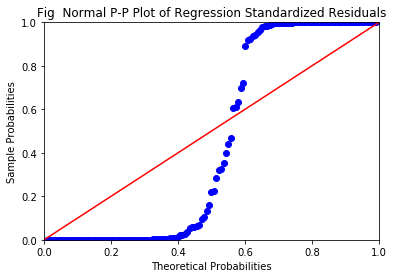

In [65]:
# creating function to PP plot, #Residual Analysis
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

adv_resid = adv_model_1.resid
probplot = sm.ProbPlot( adv_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig  Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xe92dc48>,
 'caps': [<matplotlib.lines.Line2D at 0xe92ddc8>,
 'boxes': [<matplotlib.lines.Line2D at 0xe92d408>],
 'medians': [<matplotlib.lines.Line2D at 0xe931dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xe931e48>],
 'means': []}

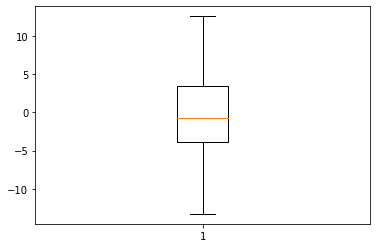

In [66]:
# box plot of residues
plt.boxplot(x=adv_resid)

In [ ]:
# not sure why the pp plot shows not normal distribution of residuals. Similar error inactual Wiley Ch4 exercise for my system

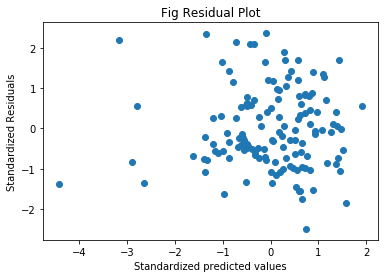

In [45]:
plt.scatter( get_standardized_values( adv_model_1.fittedvalues ),
get_standardized_values( adv_resid ) )
plt.title( "Fig Residual Plot" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");
# it satisfies assumption of constant varience of errors

In [46]:
from scipy.stats import zscore
#importing Z-score function

In [48]:
adv_df['z_score_sales'] = zscore( adv_df.Sales )
# calculating Zscore

In [49]:
adv_df[ (adv_df.z_score_sales > 3.0) | (adv_df.z_score_sales < -3.0) ]
#no outliers by z score

,Sno,TV,Radio,Newspaper,Day,Sales,z_score_sales


C:\Users\Aarushi\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


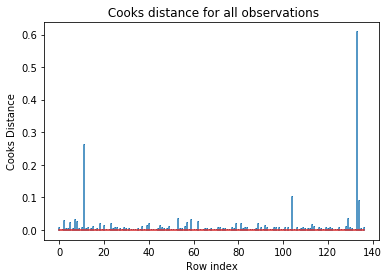

In [50]:
import numpy as np
adv_influence = adv_model_1.get_influence()
(c, p) = adv_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( " Cooks distance for all observations" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");
# cooks dis more than 0.42 is influential, ony one value is like that

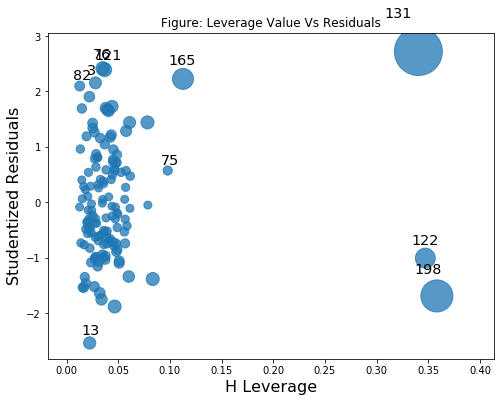

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( adv_model_1, ax = ax )
plt.title( "Figure: Leverage Value Vs Residuals")
plt.show();
# entries 131, 122 and 198 are infuential

In [53]:
# RMSE analysis
pred_y = np.power( adv_model_1.predict( test_X[train_X.columns] ), 2)
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

200.40959431337834

In [54]:
#measuring R square
np.round( metrics.r2_score(pred_y, test_y), 2 )

-123.75

In [56]:
# Making model 2 with only numeric variables
X_new_features = ["TV","Radio", "Newspaper"]

In [57]:
train_X = train_X[X_new_features]
adv_model_2 = sm.OLS(train_y, train_X).fit()
adv_model_2.summary2()
#  this model is much better as r2 is 0.74 means model explains 74%of the variability. 
#also prob of F statistic islow, so model is statistically significant, 
#also all independent variables are significant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.736   
Dependent Variable:     Sales            AIC:                         958.7016
Date:                   2020-08-11 20:19 BIC:                         967.4615
No. Observations:       137              Log-Likelihood:              -476.35 
Df Model:               3                F-statistic:                 128.4   
Df Residuals:           134              Prob (F-statistic):          3.09e-39
R-squared (uncentered): 0.742            Scale:                       62.696  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
TV             0.0411        0.0067      6.1488      0.0000      0.0279      0.0543
Radio          0.1616        0.0435      3.7166      0.0003      0.0756      0.2476
Newspaper      0.0773        0.0327      2.3688      0.0193      0.0128      0.1419
------------------------------------------------------------------------------
Omnibus:                   0.270            Durbin-Watson:               2.074
Prob(Omnibus):             0.874            Jarque-Bera (JB):            0.062
Skew:                      0.026            Prob(JB):                    0.969
Kurtosis:                  3.090            Condition No.:               12   
==============================================================================

"""

In [58]:
# calulating sales for 10 TV, 5 Radio, 2 Newspaper 
sales2 = 10*0.0411 + 5*(0.1616) + 2*(0.0773) 
sales2

1.3736